In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('df.csv')
df1['Price'] = df1['Price']*0.056
df1.head()


,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,3997.206259,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,2682.149299,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,1715.616000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,7570.938816,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,5381.365248,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [44]:
df2 = pd.read_csv('laptop_data.csv')
df2['Price'] = df2['Price']*0.056
df2.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3997.206259
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2682.149299
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1715.616000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,7570.938816
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,5381.365248


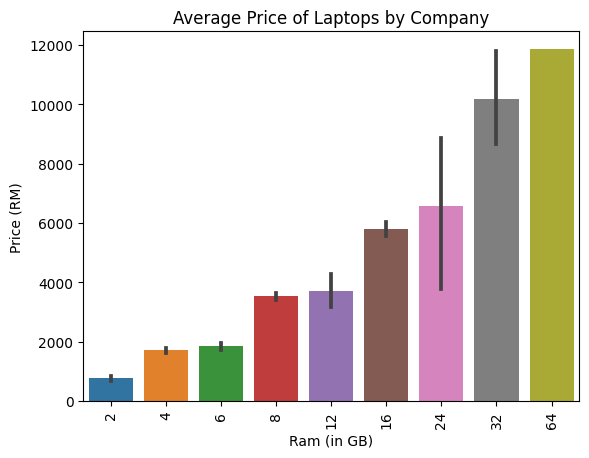

In [43]:
sns.barplot(x=df1['Ram'], y=df1['Price'])
plt.xticks(rotation="vertical")
plt.xlabel('Ram (in GB)')
plt.ylabel('Price (RM)')
plt.title('Average Price of Laptops by Company')
plt.show()

In [30]:
df1['os'].unique()

array(['Mac', 'Others/No OS/Linux', 'Windows'], dtype=object)

In [31]:
# Display the table info
df1.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'os'],
      dtype='object')

In [32]:
# Initialize the label encoder
cat_cols =  ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'os']

In [33]:
#One hot encoding
print('Dataframe encoded by OHE dimension : ', pd.get_dummies(df1, columns = cat_cols, drop_first = True).shape)

Dataframe encoded by OHE dimension :  (1302, 39)


In [34]:
#Label encoding
en = LabelEncoder()

for cols in cat_cols:
    df1[cols] = en.fit_transform(df1[cols])


In [35]:
x_train = df1.drop('Price', axis=1)
y_train = df1['Price']

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

#Make predictions on the validation data
y_pred = model.predict(x_val)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))

Mean Squared Error: 1437259.043405469
Coefficients: 
 [ 3.48845622e+01  2.31182839e+02  1.69549309e+02  5.62198519e+02
  4.56515365e+02  1.00715356e+02  1.08876377e+01  7.63716945e+01
 -4.04773179e-01  2.13800359e+00  3.33059650e+02  3.40839795e+02]
Mean squared error: 1437259.04
Coefficient of determination: 0.69


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

Linear Regression

In [38]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_val)

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))

Coefficients: 
 [ 3.48845622e+01  2.31182839e+02  1.69549309e+02  5.62198519e+02
  4.56515365e+02  1.00715356e+02  1.08876377e+01  7.63716945e+01
 -4.04773179e-01  2.13800359e+00  3.33059650e+02  3.40839795e+02]
Mean squared error: 1252870.27
Coefficient of determination: 0.73


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Random Forest

In [39]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_val)

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Coefficients: 
 [ 3.48845622e+01  2.31182839e+02  1.69549309e+02  5.62198519e+02
  4.56515365e+02  1.00715356e+02  1.08876377e+01  7.63716945e+01
 -4.04773179e-01  2.13800359e+00  3.33059650e+02  3.40839795e+02]
Mean squared error: 1184190.68
Coefficient of determination: 0.75


In [40]:
import pickle
pickle.dump(pipe,open('laptop_price_model.pkl','wb'))